# Logistic Regression

## Import Libraries

In [197]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Import Dataset

In [198]:
dataset = pd.read_csv("datasets/social_network_ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Split Dataset

In [199]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=42)

## Feature Scaling

In [200]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create Model

In [201]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

## Make Predictions

In [202]:
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.reshape(-1, 1)), 1))

[[0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 1]]


In [203]:
classifier.predict(sc.transform([[ 30, 200000 ]]))

array([1], dtype=int64)

## Create Confusion Matrix
Summary of prediction results broken down by each class

```
[[ true  neg, false pos]
 [ false neg, true pos]]
```

In [204]:
from sklearn.metrics import confusion_matrix, accuracy_score

confusion_matrix(y_test, y_pred)

array([[61,  2],
       [12, 25]], dtype=int64)

In [205]:
accuracy_score(y_test, y_pred)

0.86

## Visualize Results

In [206]:
def classifier_line(clf, X):

    # retrieve model parameters
    b = clf.intercept_[0]
    w1, w2 = clf.coef_.T

    # calculate intercept & gradient of boundary
    c = -b / w2
    m = -w1 / w2

    # get min and max x & y values
    xd = np.array([ min(X), max(X) ])
    yd = m * xd + c

    return xd, yd

[ 4.41 -2.94]


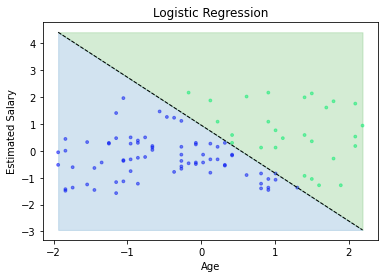

In [207]:
_X = X_test[:, 0]
_y = X_test[:, 1]
xd, yd = classifier_line(classifier, _X)

print(yd)

plt.scatter(_X, _y, c=y_pred, s=8, alpha=0.5, cmap="winter")
plt.plot(xd, yd, "k", lw=1, ls="--")

plt.fill_between(xd, yd, yd[1], color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, yd[0], color='tab:green', alpha=0.2)

plt.title("Logistic Regression")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

plt.show()